In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1: Importing data

In [2]:
#import data into separate columns
input = '../data/data.dat'
distance, error, velocity = np.loadtxt(input, usecols = (0,1,2), unpack = True, skiprows=7, delimiter='\t')

velocity = velocity/1000

#velocity now in m/s

## Part 2: Plotting data w/ error on y-axis

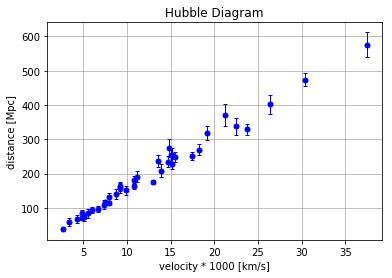

In [19]:
#initial plot
%matplotlib inline
plt.title('Hubble Diagram')
plt.ylabel('distance [Mpc]')
plt.xlabel('velocity * 1000 [km/s]')
plt.grid(True)
plt.errorbar(velocity, distance, yerr=error, fmt='bo', capsize=2, elinewidth=1, markersize=5)
plt.show()

## Part 3: Unweighted fit using polyfit

In [4]:
fit = np.polyfit(velocity, distance, deg=1)
fit = fit[::-1] #reverse the array

#check
print(fit)

[  5.16280981  15.35262538]


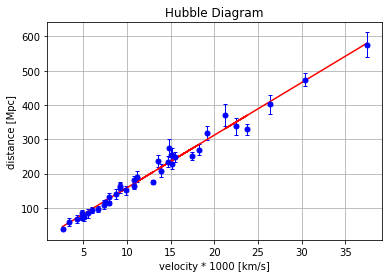

In [5]:
#plot data with polyfit line

bestfit = fit[0]+fit[1]*velocity

%matplotlib inline
plt.errorbar(velocity, distance, yerr=error, fmt='bo', capsize=2, elinewidth=1, markersize=5)
plt.title('Hubble Diagram')
plt.ylabel('distance [Mpc]')
plt.xlabel('velocity * 1000 [km/s]')
plt.grid(True)
plt.plot(velocity, bestfit, 'r-')
plt.savefig('hubblediagram.pdf')
plt.show()

## Part 3b: Histogram of residuas/error bars

[ -7.13599901   0.82068841  -1.89633583  -7.65010859 -11.32062988
   4.56875641  -5.40599783  -3.64878912 -11.12740855  -9.11587446
 -12.24593556  -4.28072113   6.02406444   0.7570402   -4.51603712
  11.64424891  16.90167225  -6.6477545  -28.12648581  11.18133543
  15.37157068  -9.84744666 -11.19892879   3.53015083  23.84693982
   4.37774832 -21.24492991  16.71591788  16.48311627 -16.01748595
  42.47545769  20.70822    -40.71605223 -13.08919183  38.75320036
  -7.91552977   3.44328563  -4.455771  ]


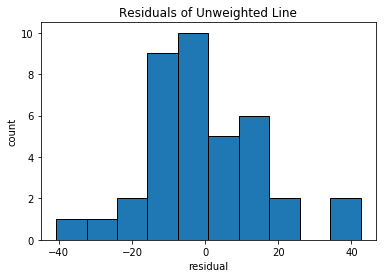

In [6]:
residuals = distance-bestfit

#glance at residuals to check against histogram
print(residuals)

%matplotlib inline
plt.hist(residuals, ec='black')
plt.title('Residuals of Unweighted Line')
plt.ylabel('count')
plt.xlabel('residual')
plt.show()

#plot histogram

In [7]:
#is this distribution gaussian?
#f(x,mu,sigma) = (1/(sigma*sqrt(2pi)))*e^((x-mu)^2/(2*sigma^2))
#mu = mean; sigma = stdev

In [8]:
sigma = np.std(residuals)
mu = np.mean(residuals)
x = np.arange(-50,50,.5) #200 points

In [9]:
def Gaussian(x, mu, sigma):
    """models a normal Gaussian distribution with mean mu,
    standard deviation sigma, and domain x"""
    
    f1 = (1/(sigma*np.sqrt(2*np.pi)))
    f2 = np.power(np.e, -np.power(x-mu, 2)/(2*np.power(sigma, 2)))
    
    values = f1*f2
    
    return values

In [10]:
gaussianFit = 400*Gaussian(x, mu, sigma)

#ensure values make sense
print(gaussianFit)

[ 0.08859995  0.09729631  0.10674575  0.11700278  0.12812476  0.140172
  0.15320778  0.16729836  0.18251304  0.19892411  0.21660689  0.23563969
  0.25610376  0.27808323  0.30166502  0.32693879  0.35399675  0.38293355
  0.41384612  0.44683347  0.48199643  0.51943748  0.5592604   0.60157001
  0.64647185  0.69407178  0.74447562  0.79778874  0.8541156   0.91355928
  0.97622098  1.04219952  1.11159077  1.18448706  1.26097662  1.34114297
  1.42506426  1.51281265  1.60445364  1.70004543  1.79963822  1.90327357
  2.01098372  2.1227909   2.23870675  2.35873162  2.48285396  2.61104977
  2.74328199  2.87949999  3.01963909  3.16362008  3.31134885  3.46271601
  3.61759665  3.77585004  3.93731952  4.10183239  4.26919988  4.43921719
  4.61166367  4.78630298  4.96288344  5.14113835  5.32078651  5.50153278
  5.68306866  5.8650731   6.04721324  6.22914534  6.41051577  6.59096202
  6.77011386  6.94759453  7.12302197  7.29601016  7.46617052  7.63311326
  7.79644888  7.95578966  8.11075116  8.26095372  8.4

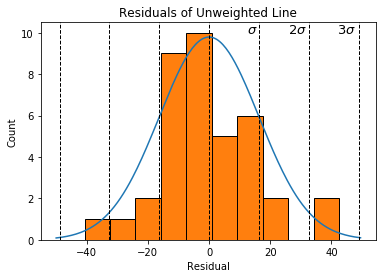

In [11]:
dottedlines = [-3*sigma, -2*sigma, -sigma, 0, sigma, 2*sigma, 3*sigma]

%matplotlib inline
plt.plot(x, gaussianFit)
plt.hist(residuals, ec='black')
plt.title('Residuals of Unweighted Line')
plt.ylabel('Count')
plt.xlabel('Residual')
plt.text(16, 10, r'$\sigma$', ha='right', size=13)
plt.text(32, 10, r'$2\sigma$', ha='right', size=13)
plt.text(48, 10, r'$3\sigma$', ha='right', size=13)
for x in dottedlines:
    plt.axvline(x, color='k', linestyle='--', linewidth=1)
plt.show()

Histogram seems fairly Guassian

## Part 4: Unweighted normal equation

In [12]:
#create X matrix full of ones
n = len(velocity)
X = np.array([np.ones(n), np.ones(n)]).T

#leave first column full of ones
#populate second column with velocity values
for i in range(n):
    X[i,1] = velocity[i]
    
#visually check the matrix
print(X)

[[  1.        2.62712]
 [  1.        3.41808]
 [  1.        4.23729]
 [  1.        4.80226]
 [  1.        5.11299]
 [  1.        4.88701]
 [  1.        5.53672]
 [  1.        6.01695]
 [  1.        6.69492]
 [  1.        7.37288]
 [  1.        7.9096 ]
 [  1.        7.48588]
 [  1.        7.9096 ]
 [  1.        8.72881]
 [  1.        9.84934]
 [  1.        9.20904]
 [  1.        9.15254]
 [  1.       10.78154]
 [  1.       12.9661 ]
 [  1.       10.76271]
 [  1.       11.09228]
 [  1.       13.91714]
 [  1.       15.17891]
 [  1.       14.72693]
 [  1.       13.57815]
 [  1.       15.53672]
 [  1.       17.41996]
 [  1.       15.06591]
 [  1.       15.11299]
 [  1.       18.22976]
 [  1.       14.83992]
 [  1.       19.10546]
 [  1.       23.75706]
 [  1.       22.50471]
 [  1.       21.26177]
 [  1.       26.35593]
 [  1.       30.32015]
 [  1.       37.45763]]


In [13]:
#create y matrix

y = np.array(np.ones(n)).reshape(-1,1)
for i in range(n):
    y[i,0] = distance[i]
    
#visually check the matrix
print(y)

[[  38.36]
 [  58.46]
 [  68.32]
 [  71.24]
 [  72.34]
 [  84.76]
 [  84.76]
 [  93.89]
 [  96.82]
 [ 109.24]
 [ 114.35]
 [ 115.81]
 [ 132.62]
 [ 139.93]
 [ 151.86]
 [ 158.19]
 [ 162.58]
 [ 164.04]
 [ 176.1 ]
 [ 181.58]
 [ 190.83]
 [ 208.98]
 [ 227.  ]
 [ 234.79]
 [ 237.47]
 [ 248.07]
 [ 251.36]
 [ 253.18]
 [ 253.67]
 [ 269.02]
 [ 275.47]
 [ 319.19]
 [ 329.18]
 [ 337.58]
 [ 370.34]
 [ 401.88]
 [ 474.1 ]
 [ 575.78]]


In [14]:
beta = np.linalg.solve(X.T.dot(X), X.T.dot(y))

print('coefficients from unweighted normal equation:')
print(beta, 2*'\n')

print('coefficients from numpy.polyfit:')
print(fit, 2*'\n')

print('same answer!')

coefficients from unweighted normal equation:
[[  5.16280981]
 [ 15.35262538]] 


coefficients from numpy.polyfit:
[  5.16280981  15.35262538] 


same answer!


## Part 5: Use polyfit w/ weighting, output covariance matrix

In [15]:
# w = 1/sigma
best, cov = np.polyfit(velocity, distance, 1, w=1/error, cov=True)



In [16]:
print('polyfit with error weight:')
for i in range(len(best)):
    print('a[{}] = {} +/- {}'.format(i, best[i], np.sqrt(cov[len(best)-i-2][len(best)-i-2])))

print('\npolyfit covariance matrix =')
print(cov)

polyfit with error weight:
a[0] = 15.307588858770766 +/- 0.3323075439391008
a[1] = -0.6427312185483293 +/- 2.846791473297645

polyfit covariance matrix =
[[ 0.1104283  -0.76154614]
 [-0.76154614  8.10422169]]


## Part 6: Express age of the universe

In [35]:
#diagonal of covariance matrix gives errors

def age_coversion(h):
    #from Mpc/m/s
    #multiply by m/Mpc
    km_to_mpc = 3.0856776e19
    s_in_year = 3.15576e7
    
    age = h*(1/1000)*km_to_mpc*(1/s_in_year)*(1/1e9)
    
    return age

In [39]:
error_cov = np.sqrt(cov[0][0])

print('The age of the universe is {} +/- {} billion years.'.format(age_coversion(best[0]), age_coversion(error_cov)))

The age of the universe is 14.96764140857306 +/- 0.32492773361849414 billion years.


## Part 7*: Censoring data

In [ ]:
censored_data = velocity

## Part 8*: Perturbing data

In [43]:
def perturbed(err):
    touch = np.random.normal(err)
    return touch

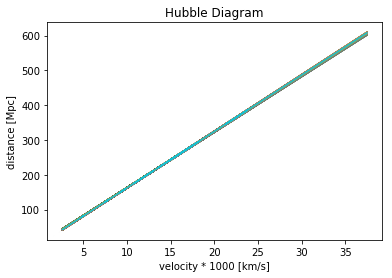

In [48]:
n = 1000 #trials

gradient = []

for i in range(n):
    perturbed_data = distance + perturbed(error)
    new_fit = np.polyfit(velocity, perturbed_data, 1, w=1/error)
    
    gradient.append(new_fit[0])
    plt.plot(velocity, velocity*new_fit[0] + new_fit[1])

plt.title('Hubble Diagram')
plt.ylabel('distance [Mpc]')
plt.xlabel('velocity * 1000 [km/s]')
plt.show()

<function matplotlib.pyplot.show>

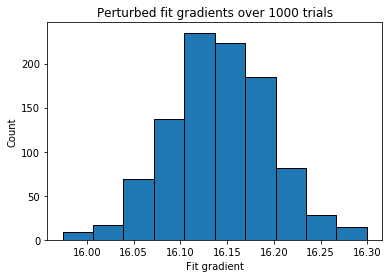

In [50]:
plt.hist(gradient, ec='black')
plt.title('Perturbed fit gradients over 1000 trials')
plt.ylabel('Count')
plt.xlabel('Fit gradient')
plt.show